### RGB and NIR Unsupervised Classification using Kmeans

##### Prepared By : Ahmed Abdelwahab

The aim of my code is to apply K-Means classification for NIR and RGB raster images collected using Airborne photogrammetry. The main goal is study the water bodies degradation.

The code also provides an accuracy assessment method to validate the training sample data before clustering all pixels in my images. 

The code was generally useful to have fair classification as the spatial resolution was 1 meter and sensitive to minor details unlike satellite images of 15-30 meter spatial resolution.

A useful tip in some noisy images to apply smoothing filters such as (Major filters or Nearest neighbors using either 4 or 8 pixels). furthermore, you can start apply some morphology algorithms to clean the data before running the classification.

ref:https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.

In [1]:
import rasterio
import rasterio.features
import rasterio.warp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

#### 1- RGB Orthomosaic raster Images

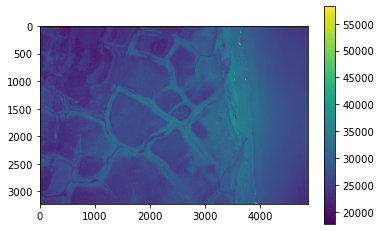

In [2]:
# Reading the raster image (teshekpukCentral RGB image)
im = rasterio.open('06026_013559744_1000_BC.tif')
im.transform
#Affine(X_size, 0.0, label.shape[1],
 #      0.0, -Y_size, label.shape[0])
#Display Band 1
plt.imshow(im.read(1))
plt.colorbar()


In [3]:
# checking the shape of raster image
im.read(1).shape

(3232, 4864)

(array([2.544480e+05, 5.016892e+06, 7.164457e+06, 2.937138e+06,
        3.353250e+05, 7.592000e+03, 2.319000e+03, 1.512000e+03,
        5.340000e+02, 2.310000e+02]),
 array([17749. , 21798.2, 25847.4, 29896.6, 33945.8, 37995. , 42044.2,
        46093.4, 50142.6, 54191.8, 58241. ]),
 <BarContainer object of 10 artists>)

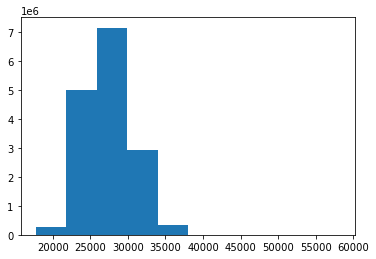

In [4]:
# Plot the histogram to display the distribution of values of pixel values(Band 1)
plt.hist(im.read(1).ravel())

(array([1.963300e+05, 5.182134e+06, 7.702929e+06, 2.502470e+06,
        1.265960e+05, 5.294000e+03, 2.438000e+03, 1.459000e+03,
        5.430000e+02, 2.550000e+02]),
 array([17890. , 21952.2, 26014.4, 30076.6, 34138.8, 38201. , 42263.2,
        46325.4, 50387.6, 54449.8, 58512. ]),
 <BarContainer object of 10 artists>)

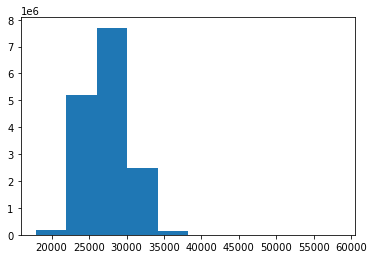

In [5]:
# Plot the histogram to display the distribution of values of pixel values(Band 2)

plt.hist(im.read(2).ravel())

(array([1.301150e+05, 6.225111e+06, 7.506204e+06, 1.767291e+06,
        8.204000e+04, 5.409000e+03, 2.167000e+03, 1.314000e+03,
        5.630000e+02, 2.340000e+02]),
 array([15581. , 19591.4, 23601.8, 27612.2, 31622.6, 35633. , 39643.4,
        43653.8, 47664.2, 51674.6, 55685. ]),
 <BarContainer object of 10 artists>)

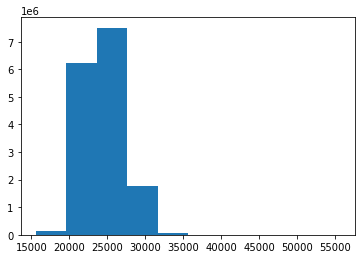

In [6]:
# Plot the histogram to display the distribution of values of pixel values(Band 3)

plt.hist(im.read(3).flatten())

In [7]:
# Invert the diemensions of my bands 
rgb = np.moveaxis(im.read(), 0, -1)

In [8]:
# before and after move-axis
rgb.shape, im.read().shape

((3232, 4864, 3), (3, 3232, 4864))

In [9]:
# normalize the values
rgbn=rgb/rgb.max()

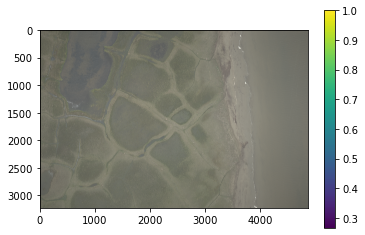

In [10]:
plt.imshow(rgbn)
plt.colorbar()

In [25]:
# classify the bands using Kmeans algorithm
X = np.c_[rgbn[:, :, 0].flatten()]
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans.labels_

array([0, 0, 2, ..., 0, 0, 0])

In [26]:
# Apply the classification 
kmeans.predict(X)

array([0, 0, 2, ..., 0, 0, 0])

In [27]:
kmeans.labels_.shape = rgbn[:, :, 0].shape

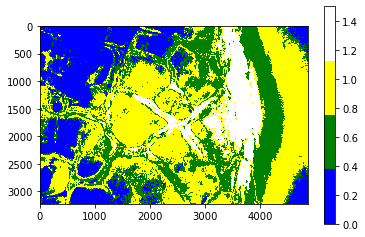

In [31]:
# Plot the classified result although still not for all bands
from matplotlib import colors

cmap = colors.ListedColormap(['blue', 'green', 'yellow', 'white'])

#plt.imshow(kmeans.labels_/2, cmap=cmap)
#plt.colorbar()
#plt.savefig('image.jpg', dpi=300)
cmap = colors.ListedColormap(['white', 'green', 'yellow', 'blue'])
im = plt.imshow(kmeans.labels_, cmap=cmap)
cbar = plt.colorbar(im)
Labels = ["Land","sand","vegetation", "water"]
cbar.set_ticks(np.arange(len(np.unique(Labels))))
cbar.set_ticklabels(np.unique(Labels))

In [ ]:
# This one worked although still not satisfying result
with rasterio.open('example642.tif', 'w',width=kmeans.labels_.shape[1], height=kmeans.labels_.shape[0],count=3,
                   dtype=(kmeans.labels_/2).dtype) as dst:
    dst.write(np.moveaxis(np.flipud(kmeans.labels_)/2, 2, 0).astype(rasterio.float64))

#### 2- NIR Orthomosaic raster Images

C:\Users\Ahmed\Anaconda3\envs\SDA\lib\site-packages\rasterio\__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


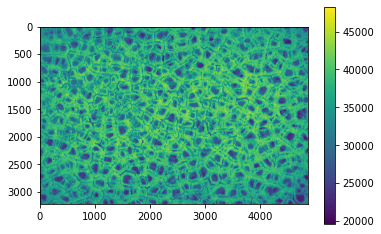

In [2]:
# reading NIR image from same area
im = rasterio.open('11830_020024339_1000.tif')
plt.imshow(im.read(1))
plt.colorbar()

(array([3.550800e+04, 4.908000e+05, 1.010212e+06, 1.535294e+06,
        1.682407e+06, 2.623430e+06, 4.906846e+06, 3.125938e+06,
        3.072530e+05, 2.760000e+03]),
 array([19549. , 22421.5, 25294. , 28166.5, 31039. , 33911.5, 36784. ,
        39656.5, 42529. , 45401.5, 48274. ]),
 <BarContainer object of 10 artists>)

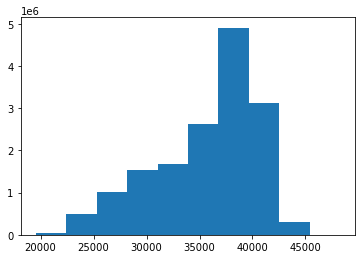

In [3]:
# Plot the histogram to display the distribution of values of pixel values(Band NIR)
plt.hist(im.read(1).ravel())

In [4]:
# Flatten the raster data to be able to classify
np.c_[im.read(1)].flatten()

array([31454, 32475, 31613, ..., 27701, 28035, 28674], dtype=uint16)

In [5]:
# classify the band using Kmeans algorithm

X = np.c_[im.read(1).flatten()]
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 1, ..., 3, 3, 3])

In [6]:
# Checking the shapes before and after clustering
kmeans.labels_.shape, np.c_[im.read(1)].shape

((15720448,), (3232, 4864))

In [7]:
# fitiing the model 
kmeans.fit_predict(X)

array([1, 1, 1, ..., 3, 3, 3])

In [8]:
# re-adjusting the shapes
kmeans.labels_.shape = im.read(1).shape
kmeans.labels_.shape

(3232, 4864)

In [22]:
kmeans.labels_.shape

(3232, 4864)

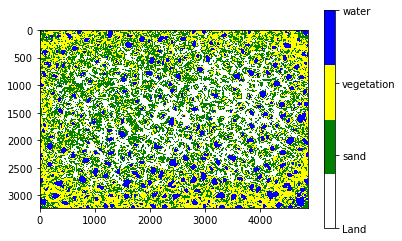

In [9]:
# plotting the raster data
from matplotlib import colors

cmap = colors.ListedColormap(['white', 'green', 'yellow', 'blue'])
im = plt.imshow(kmeans.labels_, cmap=cmap)
cbar = plt.colorbar(im)
Labels = ["Land","sand","vegetation", "water"]
cbar.set_ticks(np.arange(len(np.unique(Labels))))
cbar.set_ticklabels(np.unique(Labels))
#plt.colorbar()
#plt.savefig('image.jpg', dpi=300)

In [23]:
# extract the projection from the original image to use it for writing the raster image
import rasterio
src = rasterio.open('11830_020024339_1000.tif')
src.crs
src

<open DatasetReader name='11830_020024339_1000.tif' mode='r'>

In [25]:
# Writing the data into raster file

with rasterio.open('11830_020024339_1000_clustered.tif', 'w',width=kmeans.labels_.shape[1], height=kmeans.labels_.shape[0],count=1,
                   dtype=(kmeans.labels_).dtype) as dst:
    dst.write(kmeans.labels_, indexes=1)